<a href="https://colab.research.google.com/github/sudharb/MINST/blob/main/linearhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1 = pd.read_csv('/content/raw_house_data.csv')

In [ ]:
df1.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [ ]:
df1.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [ ]:
df1['lot_acres']=df1['lot_acres'].fillna(df1.lot_acres.mean())
df1.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [ ]:
X1=df1[['sqrt_ft','sold_price','zipcode','longitude','latitude','taxes','bedrooms']].copy()

In [ ]:
X1['sqrt_ft']=pd.to_numeric(X1['sqrt_ft'],errors='coerce')

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqrt_ft     4944 non-null   float64
 1   sold_price  5000 non-null   float64
 2   zipcode     5000 non-null   int64  
 3   longitude   5000 non-null   float64
 4   latitude    5000 non-null   float64
 5   taxes       5000 non-null   float64
 6   bedrooms    5000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 273.6 KB


In [ ]:
X1['sqrt_ft']

0       10500.0
1        7300.0
2           NaN
3        9019.0
4        6396.0
         ...   
4995     3601.0
4996     2318.0
4997     1772.0
4998     3724.0
4999     4317.0
Name: sqrt_ft, Length: 5000, dtype: float64

In [ ]:

X1['sqrt_ft']=X1['sqrt_ft'].fillna(X1.sqrt_ft.mean())

In [ ]:
X1['sqrt_ft']

0       10500.000000
1        7300.000000
2        3716.366828
3        9019.000000
4        6396.000000
            ...     
4995     3601.000000
4996     2318.000000
4997     1772.000000
4998     3724.000000
4999     4317.000000
Name: sqrt_ft, Length: 5000, dtype: float64

In [ ]:
X2=X1[['longitude','latitude']].copy()
X2['lngt']=X1['longitude'].apply(lambda X: int(math.ceil(X)))
X2['lat']=X1['latitude'].apply(lambda X: int(math.ceil(X)))


In [ ]:
X1['sold_price']=X1['sold_price'].astype(int)
X1['sqrt_ft']=X1['sqrt_ft'].astype(int)
X1['bedrooms']=X1['bedrooms'].astype(int)
X1['longitude']=X1['longitude'].astype(int)
X1['latitude']=X1['latitude'].astype(int)
X1['taxes']=X1['taxes'].astype(int)

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sqrt_ft     5000 non-null   int64
 1   sold_price  5000 non-null   int64
 2   zipcode     5000 non-null   int64
 3   longitude   5000 non-null   int64
 4   latitude    5000 non-null   int64
 5   taxes       5000 non-null   int64
 6   bedrooms    5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [ ]:

X2=X1[['sold_price','sqrt_ft','longitude','latitude']].copy()

In [ ]:
X2

,sold_price,sqrt_ft,longitude,latitude,bedrooms
437,900000,5299,-110,32,5
590,900000,2759,-111,31,3
601,850000,4594,-110,32,4
621,900000,5443,-110,32,4
629,900000,9284,-111,32,5
...,...,...,...,...,...
4995,495000,3601,-110,31,5
4996,550000,2318,-110,32,4
4997,475000,1772,-110,32,3
4998,550000,3724,-111,32,4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New section

# New section

In [ ]:

X3=(X2['sold_price']/X2['sqrt_ft']).astype(int)

X3.size



5000

In [ ]:
X4=X2.drop(['sold_price','sqrt_ft'], axis=1)
X4=X4.to_numpy()

In [ ]:



y=X3
print(len(y))

5000


In [ ]:
y=y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X4, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape
A0=X_train[0:500,:]
A1=X_train[500:1000,:]
A3=X_train[1000:1500,:]
A4=X_train[1500:2000,:]
A5=X_train[2000:2500,:]
A6=X_train[2500:3000,:]
A7=X_train[3000:3500,:]
A8=X_train[3500:4000,:]
len(A8)

500

In [ ]:
y_train.size
g1=y_train[0:500]
g2=y_train[500:1000]
g3=y_train[1000:1500]
g4=y_train[1500:2000]
g5=y_train[2000-2500]
g6=y_train[2500:3000]
g7=y_train[3000:3500]
g8=y_train[3500:4000]
g1

array([181, 216, 335, 213, 200, 195, 180, 225, 222, 198, 134, 172, 188,
       217, 284,  98, 192, 293, 182, 166, 205, 167, 209, 297, 377, 178,
       363, 146, 237, 169, 186, 175, 217, 155, 122, 159, 229, 138, 200,
       142, 167, 183, 202, 333, 342, 156, 161, 225, 190, 248, 172, 240,
       332, 214, 233, 170, 185, 175, 192, 167, 203, 270, 151, 209, 193,
       191, 150, 294, 123, 180, 248, 157, 114, 172, 230, 218, 178, 167,
       199, 156, 182, 219, 245, 229, 249, 121, 145, 177, 183, 238, 157,
       190, 187, 228, 228, 223, 195, 208, 286, 147, 268, 161, 168, 188,
       195, 206, 123, 150, 278, 160, 178, 202, 160, 582, 177, 208, 189,
       290, 182, 236, 260, 244, 313, 240, 191, 268, 248, 221, 292, 128,
       144, 174, 175, 200, 200, 217, 175, 197, 200, 222, 197, 205, 157,
       208, 190, 170, 190, 229, 283, 109, 191, 148, 222, 308, 292, 223,
       196, 345, 575, 210, 150, 144, 253, 175, 199, 309, 216, 235, 190,
       214, 187, 217, 178, 199, 209, 175, 216, 167, 167, 236, 22

In [ ]:
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self,X,K):
        epsilon=1e-3
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
            y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat

In [ ]:
knn =  KNNClassifier()

In [ ]:
for k in range (5,20):
  knn.fit(A0,g1)
  y_hat0=knn.predict(A0,5)

In [ ]:
for k in range (5,20):
  knn.fit(A1,g2)
  y_hat1=knn.predict(A1,5)

In [ ]:
for k in range(5,20):
  knn.fit(A3,g3)
  y_hat3=knn.predict(A3,5)

In [ ]:
knn.fit(A4,g4)
y_hat4=knn.predict(A4,5)

In [ ]:
knn.fit(A5,g5)


In [ ]:
knn.fit(A6,g6)
y_hat6=knn.predict(A6,5)

In [ ]:
knn.fit(A7,g7)
y_hat7=knn.predict(A7,5)

In [ ]:
knn.fit(A8,g8)
y_hat8=knn.predict(A8,5)

In [ ]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
df5 = pd.read_csv('/content/raw_house_data.csv')
df5.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [ ]:
X=df5[['sold_price','sqrt_ft','longitude','latitude','bedrooms']].copy()


In [ ]:
Q1=X.sold_price.quantile(.25)
Q3=X.sold_price.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
X=X[(X.sold_price>lower_limit)&(X.sold_price<upper_limit)]

In [ ]:
X['sqrt_ft']=pd.to_numeric(X['sqrt_ft'],errors='coerce')
X['sqrt_ft']=X['sqrt_ft'].fillna(X.sqrt_ft.mean())

In [ ]:
X[['longitude']]=X[['longitude']].astype(int)

In [ ]:
X[['latitude']]=X[['latitude']].astype(int)

In [ ]:
X[['sqrt_ft']]=X[['sqrt_ft']].astype(int)

In [ ]:
X['sold_price']=X['sold_price'].astype(int)
X['bedrooms']=X['bedrooms'].astype(int)

In [ ]:
X1=X[X.sold_price<600000]
X2=X[X.sold_price <=900000]
X3=X[X.sold_price <=1200000]
X1

,sold_price,sqrt_ft,longitude,latitude,bedrooms
1692,565000,4248,-111,31,3
1728,565000,3588,-111,31,3
1735,565000,4248,-111,31,3
1984,525000,5745,-111,32,5
2028,550000,5825,-110,31,1
...,...,...,...,...,...
4995,495000,3601,-110,31,5
4996,550000,2318,-110,32,4
4997,475000,1772,-110,32,3
4998,550000,3724,-111,32,4


In [ ]:
y1=X1.iloc[:,0]
y1
X1=X1.iloc[:,1:]


In [ ]:
y2=X2.iloc[:,0]
X2=X2.iloc[:,1:]

In [ ]:
y3=X3.iloc[:,0]
X3=X3.iloc[:,1:]

In [ ]:
y3=y3.to_numpy()
X3=X3.to_numpy()

In [ ]:
X2=X2.to_numpy()
y2=y2.to_numpy()

In [ ]:
X1=X1.to_numpy()
y1=y1.to_numpy()

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=0)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=0)

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=0)

In [ ]:
###Linear regression

In [ ]:
def OLS(Y,Y_hat,N):
    return(1/(2*N)*np.sum((Y-Y_hat)**2))

In [ ]:
class OurLinearRegression():
    def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=False):
        epochs=int(epochs)
        N,D=X.shape
        Y=y
        ###stochastic Gradient Descent
        ##Randomly initialise weights
        
        self.W=np.random.randn(D)
        J=np.zeros(epochs)
        for epoch in range(epochs):
            Y_hat=self.predict(X)
            J[epoch] = OLS(Y,Y_hat,N)
            ##weight update
            self.W -=eta*(1/N)*(X.T@(Y_hat-Y))
            
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{j}")
            plt.title("training curve")
            plt.show()
            
            
    def predict(self,X):
        return X@self.W

In [ ]:
lnn=OurLinearRegression()

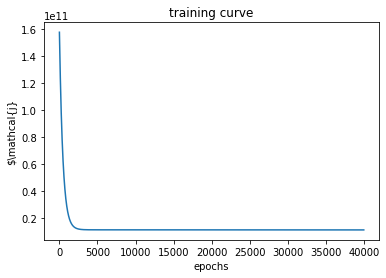

In [ ]:
lnn.fit(X1_train,y1_train,epochs=4e4,eta=1e-10,show_curve=True)



In [ ]:
xtest=np.array([[4248,-111,31,3]])

lnn.predict(xtest)

array([689240.34625885])

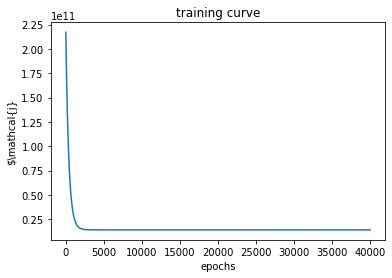

In [ ]:
lnn.fit(X2_train,y2_train,epochs=4e4,eta=1e-10,show_curve=True)

In [ ]:
xtest=np.array([[4248,-111,31,3]])

lnn.predict(xtest)

array([764160.86825739])

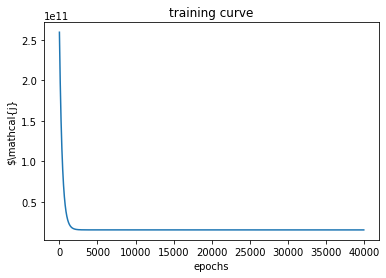

In [ ]:
lnn.fit(X3_train,y3_train,epochs=4e4,eta=1e-10,show_curve=True)


In [ ]:
xtest=np.array([[4248,-111,31,3]])

lnn.predict(xtest)

array([799710.36693037])

In [ ]:
from geopy import Nominatim
geolocator = Nominatim(user_agent="Slayerz FTW")
location = geolocator.geocode("3824 Draper Rd Tucson")

In [ ]:
loc=geolocator.geocode("1000 main street,Tucson")

In [ ]:
loc.point[0],loc.point[1]

(32.2751819, -111.0013483)

In [ ]:
def predprice(latitude, longitude):
  xtest = np.array([[2418,longitude,latitude,4]])
  n=lnn.predict(xtest)
  print(n)

def Area(area):
  loc=geolocator.geocode(area)
  predprice(loc.point[0],loc.point[1])



In [ ]:
Area("8331 N poudre drive")

[393465.99581447]
